<a href="https://colab.research.google.com/github/jaedeokhan/20_1_AI_Introduce/blob/master/pratice/0609TUE_Lab_convnets_with_small_datasets_before.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow_gpu==2.0.0

     |████████████████████████████████| 380.8MB 46kB/s 
     |████████████████████████████████| 3.8MB 52.9MB/s 
     |████████████████████████████████| 450kB 57.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=1812539e9f4a362a2f48ed8ee9370e24947e49b6d33e9232a4ce389714047025
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:

In [2]:
pip install keras==2.3.1

In [0]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [10]:
import os

#change path
root_dir = "/content/drive/My Drive/Colab Notebooks/"
base_dir = root_dir + 'CCcourse/data/'
os.chdir(base_dir)

#mount google driver
#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)
#root_dir = "/content/gdrive/My Drive/"

!pwd

/content/drive/My Drive/Colab Notebooks/CCcourse/data


---------------------
# 훈련, 검증, 테스트 폴더로 이미지 복사하기
--------------------

In [0]:
import os, shutil

#### 처음에 데이터셋을 저장을 하는데 기존의 dog, cat 파일안에 각각 사진이 있어서 구분해서 진행을 한다.

In [0]:
# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = './datasets/cats_and_dogs/dog'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './datasets/cats_and_dogs_small'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제
    shutil.rmtree(base_dir)   
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

#### 고양이 사진은 datasets/cats_and_dogs/cats 에 있어서 위와 같이 따로 한다.

In [0]:
# 훈련용 고양이 사진 디렉터리
original_dataset_dir = './datasets/cats_and_dogs/cat'

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# # 다음 500개 고양이 이미지를 validation_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# # 다음 500개 고양이 이미지를 test_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [0]:
"""
# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = './datasets/cats_and_dogs/dog'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './datasets/cats_and_dogs_small'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제
    shutil.rmtree(base_dir)   
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
# train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
# validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
# test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_cats_dir, fname)
#     shutil.copyfile(src, dst)

# # 다음 500개 고양이 이미지를 validation_cats_dir에 복사
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_cats_dir, fname)
#     shutil.copyfile(src, dst)
    
# # 다음 500개 고양이 이미지를 test_cats_dir에 복사
# fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_cats_dir, fname)
#     shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
"""

In [0]:
# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = './datasets/cats_and_dogs/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './datasets/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

2,000개의 훈련 이미지, 1,000개의 검증 이미지, 1,000개의 테스트 이미지 확인

In [0]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))

훈련용 고양이 이미지 전체 개수: 1000


In [0]:
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))

훈련용 강아지 이미지 전체 개수: 1000


In [0]:
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))

검증용 고양이 이미지 전체 개수: 500


In [0]:
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))

검증용 강아지 이미지 전체 개수: 500


In [0]:
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))

테스트용 고양이 이미지 전체 개수: 500


In [0]:
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

테스트용 강아지 이미지 전체 개수: 500


------------------
# 딥러닝 모델 구성하기
-------------------

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) # 구분기의 입력으로 연결하기 위하여 3D 텐서를 1D 텐서로 펼침
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

----------------------------
# 데이터 전처리 하기
----------------------------
  - 사진 파일을 읽음
  - JPEG 파일을 RGB 픽셀값으로 디코딩
  - 부동 소수 타입의 텐서로 변경
  - 0~1사이의 스케일로 정규화

In [0]:
# ImageDataGenerator 클래스는 디스크에 있는 이미지 파일을 전처리된 배치
# 텐서로 자동으로 바꾸어 주는 파이썬 제너레이터(generator)를 생성함.
# 즉, 배치를 끝없이 반환하는 파이썬 제너레이터를 생성
#  - 파이썬 제너레이터: yield 연산자를 사용하여 반복자(iterator)처럼 작동하는 객체
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일 조정
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 변경
        # --> Insert code here
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블 필요
        # (다중분류시 class_mode='categorical'(원-핫 인코딩 레이블) 혹은 class_mode='sparse'(정수형 레이블))
        # --> Insert code here
        )

validation_generator = test_datagen.flow_from_directory(
        # --> Insert code here
        # --> Insert code here
        batch_size=20,
        # --> Insert code here
        )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [0]:
# 제너레이터 사용시 fit_generator 메서드 사용
history = model.fit_generator(
      # --> Insert code here, #입력과 레이블의 배치를 끝없이 생성
      steps_per_epoch=100, #20개의 샘플이 하나의 배치, 2,000개 샘플을 모두 처리할때까지 100개의 배치 추출이 필요
      epochs=30,
      # --> Insert code here
      validation_steps=50) #배치가 20개로 설정, 전체 검증 데이터 1,000개를 사용하려면, 50개의 배치 추출 필요

Epoch 1/30
100/100 [==============================] - 17s 170ms/step - loss: 0.6851 - acc: 0.5580 - val_loss: 0.6454 - val_acc: 0.6320
Epoch 2/30
100/100 [==============================] - 11s 109ms/step - loss: 0.6425 - acc: 0.6320 - val_loss: 0.7419 - val_acc: 0.6290
Epoch 3/30
100/100 [==============================] - 11s 110ms/step - loss: 0.6000 - acc: 0.6825 - val_loss: 0.7232 - val_acc: 0.6470
Epoch 4/30
100/100 [==============================] - 11s 112ms/step - loss: 0.5663 - acc: 0.7210 - val_loss: 0.6722 - val_acc: 0.6730
Epoch 5/30
100/100 [==============================] - 11s 112ms/step - loss: 0.5358 - acc: 0.7340 - val_loss: 0.6801 - val_acc: 0.6530
Epoch 6/30
100/100 [==============================] - 11s 111ms/step - loss: 0.5096 - acc: 0.7500 - val_loss: 0.5358 - val_acc: 0.6950
Epoch 7/30
100/100 [==============================] - 11s 110ms/step - loss: 0.4786 - acc: 0.7760 - val_loss: 0.5387 - val_acc: 0.7000
Epoch 8/30
100/100 [==============================] - 1

-------------------
# 모델 저장하기
--------------------

In [0]:
model.save('cats_and_dogs_small_1.h5')

-------------
# 훈련의 정확도와 손실 그래프 그리기
---------------

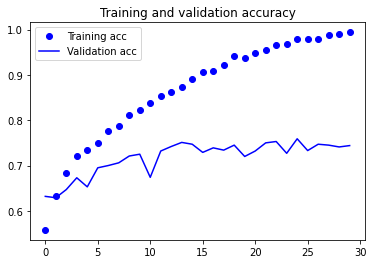

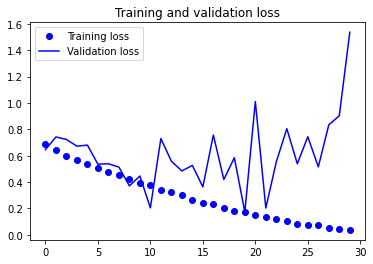

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

---------
#데이터 증식 사용하기
-----------

In [0]:
# ImageDataGenerator를 상용하여 데이터 증식 설정하기
datagen = ImageDataGenerator(
      rotation_range=40,  # 랜덤하게 이미지를 회전시킬 각도 범위 설정
      width_shift_range=0.2,  # 이미지를 수평으로 랜덤하게 평행이동 시킬 범위 설정
      height_shift_range=0.2, # 이미지를 수직으로 랜덤하게 평행이동 시킬 범위 설정
      shear_range=0.2, # 랜덤하게 전단변환(shearing transforming)을 적용할 각도 범위 설정
      zoom_range=0.2, # 랜덤하게 사진을 확대할 범위 설정
      horizontal_flip=True, # 랜덤하게 이미지를 수평으로 뒤집음
      fill_mode='nearest') # 회전이나 가로/세로 이동으로 인하여 새롭게 생성해야 할 픽셀을 채우는 방법 설정
# https://keras.io/api/preprocessing/image/ 참조

랜덤하게 증식된 훈련 이미지 도시

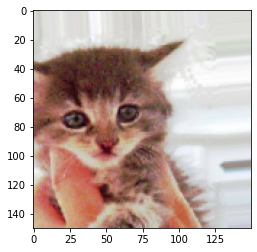

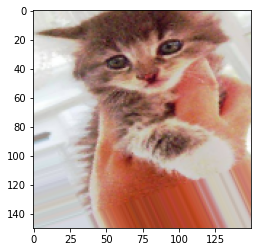

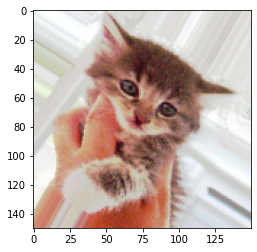

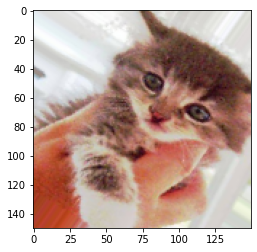

In [0]:
# 이미지 전처리 유틸리티 모듈
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 증식할 이미지 선택
img_path = fnames[3]

# 이미지를 읽고 크기를 변경
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환
x = image.img_to_array(img)

# (1, 150, 150, 3) 크기로 변환
x = x.reshape((1,) + x.shape)

# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성,
# 무한 반복되기 때문에 어느 지점에서 중지필요
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

-------------
# 드롭아웃을 포함한 새로운 모델 정의하기
---------------

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())     # 구분기의 입력으로 연결하기 위하여 3D 텐서를 1D 텐서로 펼침
# --> Insert code here
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

데이터 증식과 제너레이터를 사용하기 모델 훈련하기

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됨
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        # --> Insert code here
        # 모든 이미지를 150 × 150 크기로 변경
        target_size=(150, 150),
        batch_size=32,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만듬
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        # --> Insert code here
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      # --> Insert code here
      steps_per_epoch=100,
      epochs=100,
      # --> Insert code here
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 33s 335ms/step - loss: 0.6926 - accuracy: 0.5303 - val_loss: 0.6701 - val_accuracy: 0.5717
Epoch 2/100
100/100 [==============================] - 30s 305ms/step - loss: 0.6808 - accuracy: 0.5644 - val_loss: 0.7324 - val_accuracy: 0.5760
Epoch 3/100
100/100 [==============================] - 30s 299ms/step - loss: 0.6646 - accuracy: 0.5991 - val_loss: 0.6917 - val_accuracy: 0.6263
Epoch 4/100
100/100 [==============================] - 30s 304ms/step - loss: 0.6556 - accuracy: 0.6074 - val_loss: 0.6710 - val_accuracy: 0.6630
Epoch 5/100
100/100 [==============================] - 29s 291ms/step - loss: 0.6382 - accuracy: 0.6364 - val_loss: 0.6312 - val_accuracy: 0.6301
Epoch 6/100
100/100 [==============================] - 32s 322ms/step - loss: 0.6188 - accuracy: 0.6526 - val_loss: 0.6141 - val_accuracy: 0.6347
Epoch 7/100
100/100 [===================

-------------------
# 모델 저장하기
--------------------

In [0]:
model.save('cats_and_dogs_small_2.h5')

-------------
# 훈련의 정확도와 손실 그래프 그리기
---------------

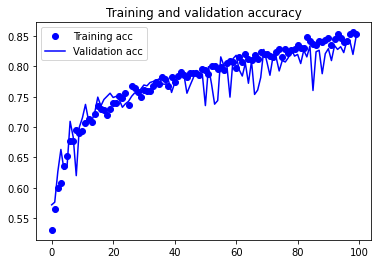

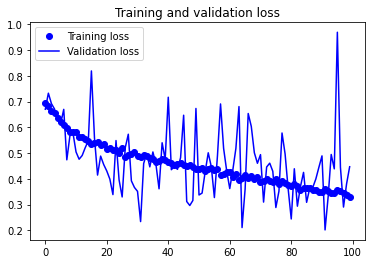

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()